<center>
<img src="../../img/ods_stickers.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/), data scientist @ Mail.Ru Group <br>
Translated and edited by Sergey Isaev, Artem Trunov, and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) <br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #1
## <center>  Exploratory data analysis with Pandas


**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already  in the repository). Choose the answers in the [web-form](https://docs.google.com/forms/d/1ws9mchvdVGRyva_y_cPjASED8ATZTOsQFKfimohNaFE).**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [13]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['patch.force_edgecolor'] = True
sns.set_style("darkgrid")

In [14]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**How many observations are there in the dataset?**

In [25]:
print(data.shape)

(32561, 15)


Our dataset has 32561 obsevations and 15 features.

**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [21]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

Number of Male = 21790
Number of Female = 10771

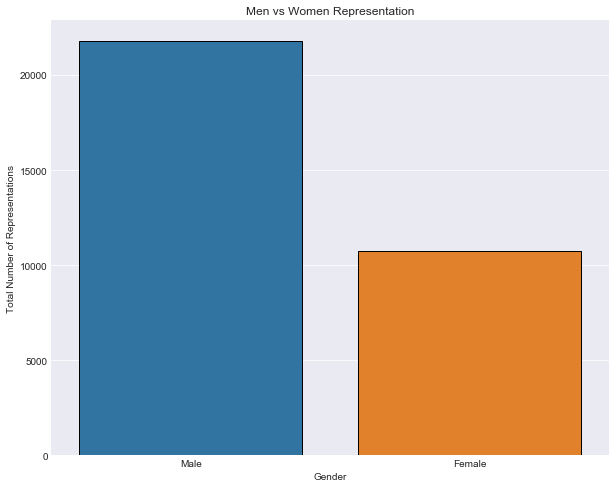

In [72]:
plot1 = sns.countplot(data['sex'])
plot1.set_title('Men vs Women Representation')
plot1.set_xlabel('Gender')
plot1.set_ylabel('Total Number of Representations')
plt.show()

**2. What is the average age (*age* feature) of women?**

In [44]:
data.groupby(['sex'])['sex', 'age'].mean()

,age
sex,
Female,36.858230
Male,39.433547


Average age of Male is 39.434
**Average age of Female is 36.858**

In our dataset, females are about two and half years younger than males

**3. What is the percentage of German citizens (*native-country* feature)?**

In [63]:
data['native-country'].value_counts(normalize=True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

**German citizens account for about 0.4207% of the entire dataset.**
And Germany has the fifth highest representations in this dataset.

**4. Make a population histogram (*bar plot*) of people's education (*education* feature).**

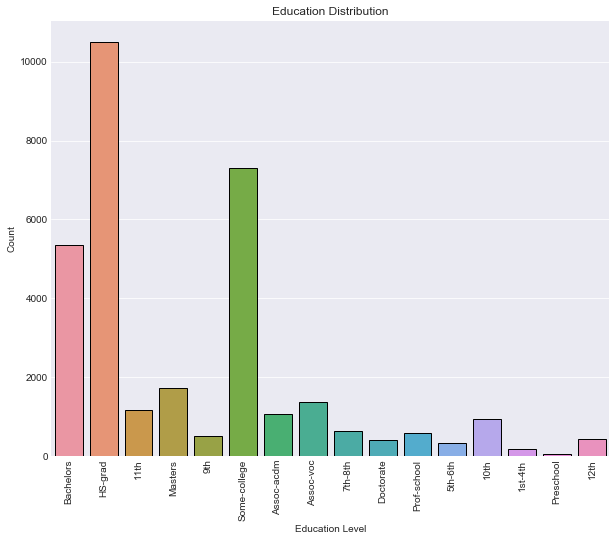

In [79]:
plot2 = sns.countplot(data['education'])
plot2.set_title('Education Distribution')
plot2.set_xlabel('Education Level')
plot2.set_ylabel('Count')
plot2.xaxis_inverted()
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90)
plt.show()

**5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [87]:
data.groupby(['salary'])['age'].describe(include=['object'])

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


For people who earn > 50K, average age = 44.25 and std = 10.51

For people who earn <=50K, average age = 36.783 and std=14

This indicates that younger people have less earning.

**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [88]:
data[data['salary'] == '>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**We can clearly see that people with lesser than high school level education are still earning > 50K. Therefore, the answer is False.**

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [91]:
data.groupby(['race','sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

Maximum age of men from Amer-Indian-Eskimo racial origin is **82 years.**

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [124]:
married = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
data.groupby([data[data['sex'] == 'Male']['marital-status'].apply(lambda x: 'Married Men' if x in married else 'Single Men'),'salary'])['salary'].describe(percentiles=[])

count unique    top  freq
marital-status salary                          
Married Men    <=50K   7576      1  <=50K  7576
               >50K    5965      1   >50K  5965
Single Men     <=50K   7552      1  <=50K  7552
               >50K     697      1   >50K   697

We can see that the proportion of those who earn >50K is much greater for Married Men(5965/7576) as compared to Single Men(697/7552)

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [127]:
data['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Maximum number of hours a person works per week = 99 hours

In [152]:
data[data['hours-per-week']==99]['hours-per-week'].count()

85

85 people work for 99 hours per week

In [153]:
data[data['hours-per-week']==99]['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

Out of all the people who work for 99 hours a week, about 29.42% of them earn >50K

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [154]:
data.pivot_table(['hours-per-week'],['native-country','salary'], aggfunc='mean')

hours-per-week
native-country             salary                
?                          <=50K        40.164760
                           >50K         45.547945
Cambodia                   <=50K        41.416667
                           >50K         40.000000
Canada                     <=50K        37.914634
                           >50K         45.641026
China                      <=50K        37.381818
                           >50K         38.900000
Columbia                   <=50K        38.684211
                           >50K         50.000000
Cuba                       <=50K        37.985714
                           >50K         42.440000
Dominican-Republic         <=50K        42.338235
                           >50K         47.000000
Ecuador                    <=50K        38.041667
                           >50K         48.750000
El-Salvador                <=50K        36.030928
                           >50K         45.000000
England                    <=50K        40.483333
                           >50K         44.533333
France                     <=50K        41.058824
                           >50K         50.750000
Germany                    <=50K        39.139785
                           >50K         44.977273
Greece                     <=50K        41.809524
                           >50K         50.625000
Guatemala                  <=50K        39.360656
                           >50K         36.666667
Haiti                      <=50K        36.325000
                           >50K         42.750000
...                                           ...
Mexico                     >50K         46.575758
Nicaragua                  <=50K        36.093750
                           >50K         37.500000
Outlying-US(Guam-USVI-etc) <=50K        41.857143
Peru                       <=50K        35.068966
                           >50K         40.000000
Philippines                <=50K        38.065693
                           >50K         43.032787
Poland                     <=50K        38.166667
                           >50K         39.000000
Portugal                   <=50K        41.939394
                           >50K         41.500000
Puerto-Rico                <=50K        38.470588
                           >50K         39.416667
Scotland                   <=50K        39.444444
                           >50K         46.666667
South                      <=50K        40.156250
                           >50K         51.437500
Taiwan                     <=50K        33.774194
                           >50K         46.800000
Thailand                   <=50K        42.866667
                           >50K         58.333333
Trinadad&Tobago            <=50K        37.058824
                           >50K         40.000000
United-States              <=50K        38.799127
                           >50K         45.505369
Vietnam                    <=50K        37.193548
                           >50K         39.200000
Yugoslavia                 <=50K        41.600000
                           >50K         49.500000

[82 rows x 1 columns]

In [155]:
data[data['native-country'] =='Japan'].pivot_table(['hours-per-week'],['native-country','salary'], aggfunc='mean')

hours-per-week
native-country salary                
Japan          <=50K        41.000000
               >50K         47.958333

For people who earn <=50K, average hours-per week is 41 hours.
For those who earn > 50K, average hours-per-week is 47.958 hours